# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics ,linear_model

## **Data Preprocessing**

 **Importing the dataset**

In [ ]:
# Reading data from url

url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
s_data.shape

(25, 2)

In [ ]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
#data cleaning

s_data.isna( )

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Let's plot our data on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

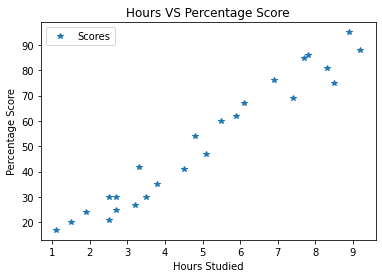

In [ ]:
s_data.plot(x="Hours",y="Scores",style="*")
plt.title("Hours VS Percentage Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## **Splitting the dataset**

**After that, we need to extract the dependent and independent variables from the given dataset. The independent variable is Study Hours, and the dependent variable is Percentage Scored. Below is code for it:**

In [ ]:
x = s_data.iloc[:,:-1].values #independent variable 
y = s_data.iloc[:,1].values  #dependent variable 
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**We need to split our dataset into the test and train set.
We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


## **Training the Algorithm**
**Fitting linear regression model to the training set**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

**Visualizing the training set result**

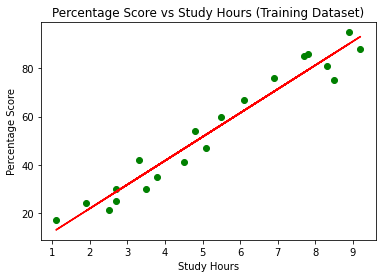

In [ ]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Percentage Score vs Study Hours (Training Dataset)")  
plt.xlabel("Study Hours")  
plt.ylabel("Percentage Score")  
plt.show()   

**Visualizing the test set result**

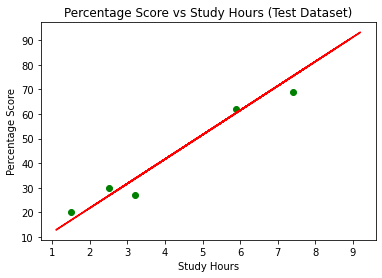

In [ ]:
plt.scatter(x_test, y_test, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Percentage Score vs Study Hours (Test Dataset)")  
plt.xlabel("Study Hours")  
plt.ylabel("Percentage Score")  
plt.show()

**Making Predictions**

**Now that we have trained our algorithm, it's time to make some predictions.**

In [ ]:
y_pred = regressor.predict(x_test) # Predicting the score

In [ ]:
# Comparing Actual and Predicted

df={'Actual': y_test, 'Predicted': y_pred}
df1 = pd.DataFrame(df)
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**You can also test with your own data**

In [ ]:
hours= 9.25
own_pred = regressor.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:

hours = 9.63
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.63
Predicted Score = 97.45778195001944


## **Evaluating the model performance**
**Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship. Let us look at R-squared,MSE,MAE.**

**1.Using R-squared method**

In [ ]:
print('r2 score:', 
      metrics.r2_score(y_test, y_pred)) 

r2 score: 0.9454906892105354


**2.Using Mean Square Error**

In [ ]:
print("mean square error :",metrics.mean_squared_error(y_test,y_pred))

mean square error : 21.598769307217456


**3.Using Mean Absolute Error**

In [ ]:
print("mean absolute error :",metrics.mean_absolute_error(y_test,y_pred))

mean absolute error : 4.183859899002982
